In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import time 
from tqdm import tqdm
import pandas as pd
from Delta_Hedging_Binomial import *
from semi_static_hedging import *
from parallel_RLNN import *

In [ ]:
S0 = 50                                 # Initial stock price
K = 50                                  # Strike price
mu = 0.06                               # Risk free rate
sigma = 0.2                             # Volatility
T = 1                                   # Time to maturity
N = 4                                   # Number of monitoring dates
M = 5000                                # Number of sample paths

In [2]:
S0 = 50
K = 50 
mu = 0.06
sigma = 0.2
T = 1
hedge_freq = 52
monitoring_dates = np.array([0.25, 0.5, 0.75, 1])
hedging_dates = np.linspace(0, T, int(T * hedge_freq) + 1)
M = 10000
hedging_error = calculate_hedge_error(S0, K, mu, sigma, T, hedge_freq, monitoring_dates, hedging_dates, M)

100%|██████████| 10000/10000 [02:51<00:00, 58.19it/s]


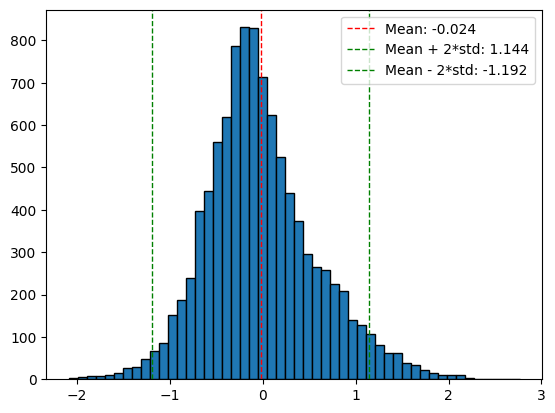

In [3]:
hedging_error = np.array(hedging_error)
plt.hist(hedging_error, bins=50, edgecolor='black')
plt.axvline(hedging_error.mean(), color='r', linestyle='dashed', linewidth=1, label=f'Mean: {round(hedging_error.mean(), 3)}')   
plt.axvline(hedging_error.mean() + 1.96*hedging_error.std(), color='g', linestyle='dashed', linewidth=1, label=f'Mean + 2*std: {round(hedging_error.mean() + 1.96*hedging_error.std(), 3)}')
plt.axvline(hedging_error.mean() -1.96*hedging_error.std(), color='g', linestyle='dashed', linewidth=1, label=f'Mean - 2*std: {round(hedging_error.mean() - 1.96*hedging_error.std(), 3)}') 
plt.legend()
plt.show()

In [ ]:
S0 = 50
K = 1.2 * S0
mu = 0.06
sigma = 0.2
T = 1
hedge_freq = 52
monitoring_dates = np.array([0.25, 0.5, 0.75, 1])
hedging_dates = np.linspace(0, T, int(T * hedge_freq) + 1)
M = 10000
hedging_error_120 = calculate_hedge_error(S0, K, mu, sigma, T, hedge_freq, monitoring_dates, hedging_dates, M)


In [ ]:
plt.hist(hedging_error_120, bins=50, edgecolor='black')
plt.axvline(hedging_error_120.mean(), color='r', linestyle='dashed', linewidth=1)
plt.show()

In [ ]:
S0 = 50
K = 0.8 * S0
mu = 0.06
sigma = 0.2
T = 1
hedge_freq = 52
monitoring_dates = np.array([0.25, 0.5, 0.75, 1])
hedging_dates = np.linspace(0, T, int(T * hedge_freq) + 1)
M = 10000
hedging_error_80 = calculate_hedge_error(S0, K, mu, sigma, T, hedge_freq, monitoring_dates, hedging_dates, M)

In [ ]:
plt.hist(hedging_error_80, bins=50, edgecolor='black')
plt.axvline(hedging_error_80.mean(), color='r', linestyle='dashed', linewidth=1)
plt.show()

In [ ]:
## Using Numba with 50000 simulations and Hedging frequency of 48
plt.hist(hedging_error, bins=50, label='K /S0= 1', color='r', alpha=0.5)
plt.axvline(np.mean(hedging_error), color='r', linestyle='dashed', linewidth=1, label='K/S0=1 Mean')
plt.hist(hedging_error_80, bins=50, label='K /S0= 0.8', color='b', alpha=0.5)
plt.axvline(np.mean(hedging_error_80), color='b', linestyle='dashed', linewidth=1, label='K/S0=0.8 Mean')
plt.hist(hedging_error_120, bins=50, label='K /S0= 1.2', color='g', alpha=0.5)
plt.axvline(np.mean(hedging_error_120), color='g', linestyle='dashed', linewidth=1, label='K/S0=1.2 Mean')
plt.legend()
plt.show()

### Experiments 

In [3]:

## In the money Bermudan put option
S0 = 50  # Initial price
sigma = 0.2  # Volatility
K = 50 * 1.2  # Strike price
r = 0.06  # Risk-free rate
T = 1.  # Maturity
M = 4  # Number of monitoring dates
N = 10000  # Number of sample paths
nodes = 16 # Number of hidden units
style = 'put'  # Payoff type
ler_rate = 0.001
price, weights, errors = RLNN_Algo(S0, K, r, sigma, N, M, T, style, nodes, ler_rate)
print("Bermudan Price", price)
print(errors)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step
Epoch 47: early stopping
Restoring model weights from the end of the best epoch: 27.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step
Epoch 43: early stopping
Restoring model weights from the end of the best epoch: 23.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step
Epoch 40: early stopping
Restoring model weights from the end of the best epoch: 20.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step
Bermudan Price 9.403307847565722
[2.9942571747482938e-09, 0.0001704563466277508, 0.000163783578471432, 8.831710720245659e-05]


In [4]:
stock_prices = stock_price_simulator(S0, r, sigma, T, M, 10000)
hedge_error12 = semi_static_hedging_simulation(stock_prices, weights, r, sigma, T, M, S0, 50 * 1.2, price, nodes)

In [ ]:
## At the money Bermudan put option

S0 = 50  # Initial price
sigma = 0.2  # Volatility
K = 50  # Strike price
r = 0.06  # Risk-free rate
T = 1.  # Maturity
M = 4  # Number of monitoring dates
N = 10000  # Number of sample paths
nodes = 16 # Number of hidden units
style = 'put'  # Payoff type
price3, weights3, errors3 = RLNN_Algo(S0, K, r, sigma, N, M, T, style, nodes, ler_rate)
print("Bermudan Price", price3)
print(errors3)

stock_prices = stock_price_simulator(S0, r, sigma, T, M, 10000)
hedge_error1 = semi_static_hedging_simulation(stock_prices, weights3, r, sigma, T, M, S0, 50, price3, nodes)

In [ ]:
## Out of the money Bermudan put option
S0 = 50  # Initial price
sigma = 0.2  # Volatility
K = 0.8 * 50  # Strike price
r = 0.06  # Risk-free rate
T = 1.  # Maturity
M = 4  # Number of monitoring dates
N = 10000  # Number of sample paths
nodes = 16 # Number of hidden units
style = 'put'  # Payoff type
price2, weights2, errors2 = RLNN_Algo(S0, K, r, sigma, N, M, T, style, nodes, ler_rate)
print("Bermudan Price", price2)
print(errors2)


stock_prices = stock_price_simulator(S0, r, sigma, T, M, 10000)
hedge_error08 = semi_static_hedging_simulation(stock_prices, weights2, r, sigma, T, M, S0, 50 * 0.8, price2, nodes)

In [ ]:
plt.hist(hedge_error12,bins=50, edgecolor='black',color='r', alpha=0.7, label='K/S0=1.2')
plt.hist(hedge_error08, bins=50, edgecolor='k',color='g',  alpha=0.7, label='K/S0 = 0.8')
plt.hist(hedge_error1, bins=50, edgecolor='k', alpha=0.7, label='K/S0 = 1')
plt.legend()
plt.show()